# Imports

In [1]:
import sys
sys.path.append('..')
from common import *

# Common functions

In [2]:
def crop_img_black_parts_horizontaly(img):
    max_x = -1
    for x in range(len(img[0]) - 1, -1, -1):
        if max_x != -1:
            break
        for y in range(len(img)):
            if (img[y, x, :] != 0).any():
                max_x = x
                break
    
    return img[:, 0:max_x, :]

In [3]:
def merge_two_images(query_img, train_img):
    query_kp, query_des = get_image_sift_feature(query_img)
    train_kp, train_des = get_image_sift_feature(train_img)
    matches = get_matches(query_des, train_des, 0.8)
    pts_dst = get_matched_pt(query_kp, matches, 0, len(matches))
    pts_src = get_matched_pt(train_kp, matches, 1, len(matches))
    h = compute_homography_ransac(pts_dst, pts_src)
    target_img = wrap_prespective(train_img, h, (query_img.shape[1] + train_img.shape[1], query_img.shape[0]))
    for y in range(len(query_img)):
        for x in range(len(query_img[0])):
            if (target_img[y, x, :] == [0, 0, 0]).all():
                target_img[y, x, :] = query_img[y, x, :]
                
    target_img = crop_img_black_parts_horizontaly(target_img)
    return target_img

# 2.3 Create the output mosaic

## Example 1 (Two images)

In [4]:
train_img = cv2.imread('img\image1.jpg')
query_img = cv2.imread('img\image2.jpg')

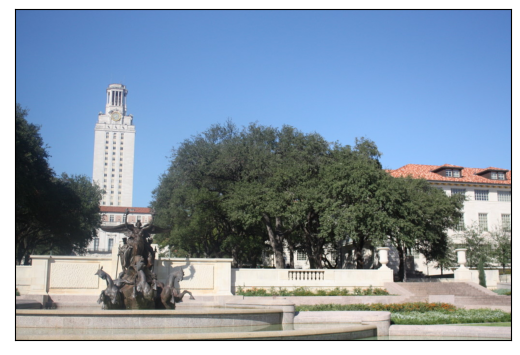

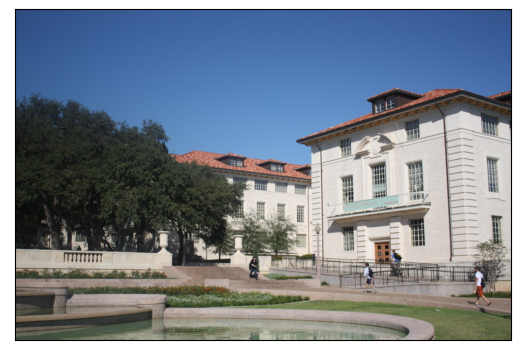

In [5]:
show_image(query_img)
show_image(train_img)

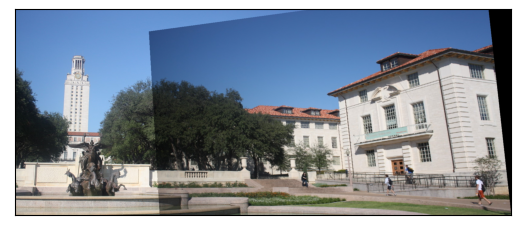

In [6]:
merged_img = merge_two_images(query_img, train_img)
show_image(merged_img)

## Example 2 (Two images)

In [7]:
query_img = cv2.imread('img\example2-1.png')
train_img = cv2.imread('img\example2-2.png')

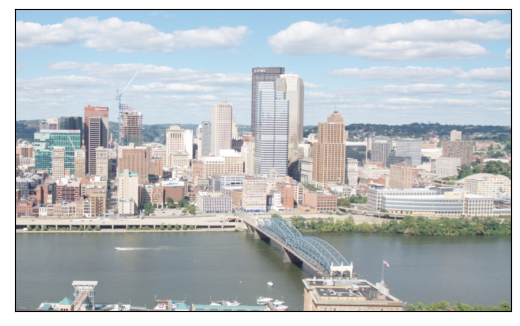

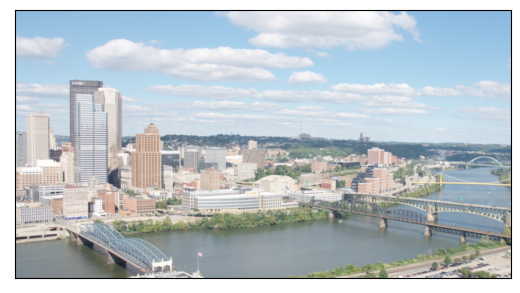

In [8]:
show_image(query_img)
show_image(train_img)

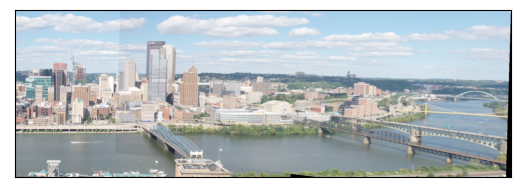

In [9]:
merged_img = merge_two_images(query_img, train_img)
show_image(merged_img)

## Example 3 (Three images)

In [10]:
img1 = cv2.imread('img\shanghai-21.png')
img2 = cv2.imread('img\shanghai-22.png')
img3 = cv2.imread('img\shanghai-23.png')

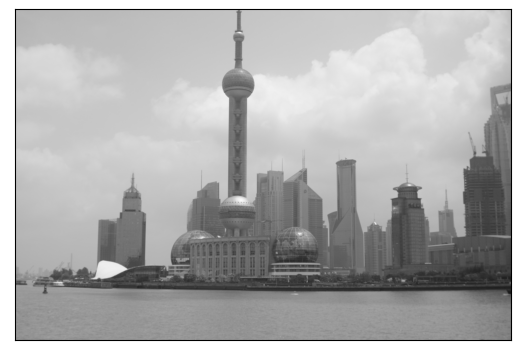

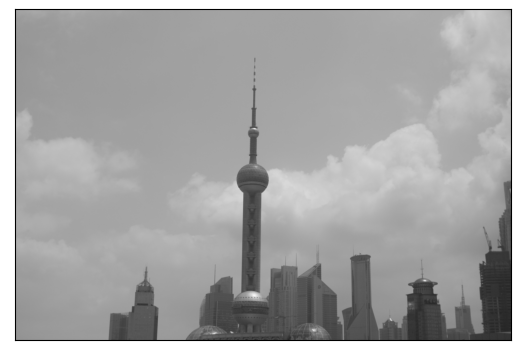

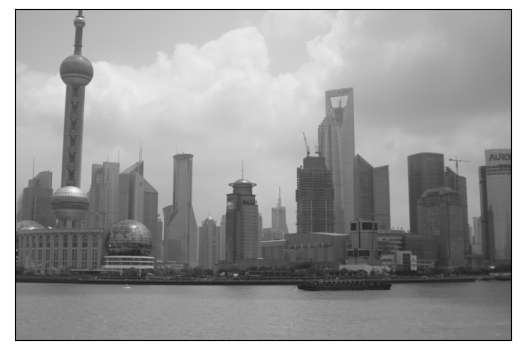

In [11]:
show_image(img1)
show_image(img2)
show_image(img3)

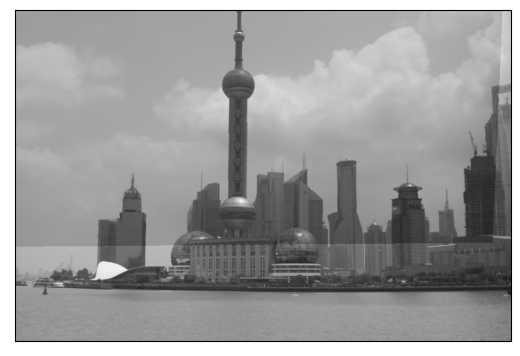

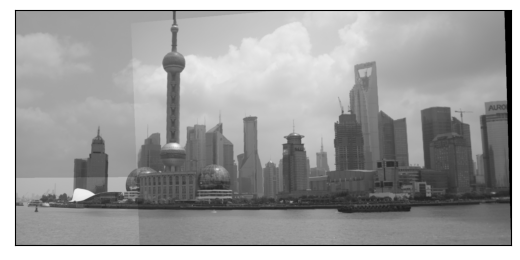

In [12]:
target1 = merge_two_images(img1, img2)
show_image(target1)
target2 = merge_two_images(target1, img3)
show_image(target2)